[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/One_Hidden_Layer_NN.ipynb)

Info:
    
    Iris Data
    Use ['Sepal length', 'Sepal width', 'petal length'] to predict ['petal width']
    10 nodes
    loss = MSE across batch
    activation = relu
    

In [0]:
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [0]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[-1] for x in iris.data])

In [0]:
sess = tf.Session()

In [0]:
seed = 23
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [0]:
def norm_data(data):
    col_min = data.min(axis = 0)
    col_max = data.max(axis = 0)
    return (data - col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(norm_data(x_vals_train))
x_vals_test = np.nan_to_num(norm_data(x_vals_test))


In [0]:
batch_size = 50

x_data = tf.placeholder(shape = [None,3], dtype=tf.float32)
y_target = tf.placeholder(shape = [None,1], dtype=tf.float32)

In [0]:
#NN layers attributes

hidden_nodes = 10

A1 = tf.Variable(tf.random_normal(shape = [3, hidden_nodes])) #inout to hidden
b1 = tf.Variable(tf.random_normal(shape = [hidden_nodes])) #biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape = [hidden_nodes,1])) # hidden nodes to one output
b2 = tf.Variable(tf.random_normal(shape = [1])) # 1 bias for the output

In [0]:
# NN opeartions

hidden_layer_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_layer_output, A2),b2))

#loss function (mean squared error)
loss = tf.reduce_mean(tf.square(y_target - final_output))

#get the optimizer

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

#initialize the variable

init = tf.global_variables_initializer()
sess.run(init)

In [0]:


loss_vec = []
test_set_loss = []

for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    
    test_temp_loss= sess.run(loss, feed_dict={x_data: x_vals_test, 
                                              y_target: np.transpose([y_vals_test])})
    
    test_set_loss.append(test_temp_loss)
    
    if(i+1)%50:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
        

Generation: 1. Loss = 1.8053758
Generation: 2. Loss = 1.2998538
Generation: 3. Loss = 1.1493701
Generation: 4. Loss = 1.0062242
Generation: 5. Loss = 1.0767815
Generation: 6. Loss = 0.70342505
Generation: 7. Loss = 0.9696334
Generation: 8. Loss = 1.0968672
Generation: 9. Loss = 0.81700975
Generation: 10. Loss = 0.9351399
Generation: 11. Loss = 0.67260206
Generation: 12. Loss = 0.74020594
Generation: 13. Loss = 0.7807267
Generation: 14. Loss = 0.682687
Generation: 15. Loss = 0.6618243
Generation: 16. Loss = 1.064319
Generation: 17. Loss = 0.56446594
Generation: 18. Loss = 0.6634968
Generation: 19. Loss = 0.5441125
Generation: 20. Loss = 0.6138998
Generation: 21. Loss = 0.63488364
Generation: 22. Loss = 0.6168773
Generation: 23. Loss = 0.59818196
Generation: 24. Loss = 0.52882296
Generation: 25. Loss = 0.67986506
Generation: 26. Loss = 0.45692527
Generation: 27. Loss = 0.5702445
Generation: 28. Loss = 0.667256
Generation: 29. Loss = 0.53574044
Generation: 30. Loss = 0.6228302
Generation:

Generation: 333. Loss = 0.103505895
Generation: 334. Loss = 0.10914357
Generation: 335. Loss = 0.10935957
Generation: 336. Loss = 0.10759729
Generation: 337. Loss = 0.123661794
Generation: 338. Loss = 0.081200816
Generation: 339. Loss = 0.06523758
Generation: 340. Loss = 0.0713711
Generation: 341. Loss = 0.08072008
Generation: 342. Loss = 0.10149267
Generation: 343. Loss = 0.05660079
Generation: 344. Loss = 0.08075547
Generation: 345. Loss = 0.10700004
Generation: 346. Loss = 0.09158628
Generation: 347. Loss = 0.08845837
Generation: 348. Loss = 0.09631733
Generation: 349. Loss = 0.09497884
Generation: 351. Loss = 0.10098349
Generation: 352. Loss = 0.10690346
Generation: 353. Loss = 0.09884224
Generation: 354. Loss = 0.08751131
Generation: 355. Loss = 0.08002004
Generation: 356. Loss = 0.08546873
Generation: 357. Loss = 0.05594029
Generation: 358. Loss = 0.113289356
Generation: 359. Loss = 0.07647341
Generation: 360. Loss = 0.117890485
Generation: 361. Loss = 0.108437985
Generation: 362

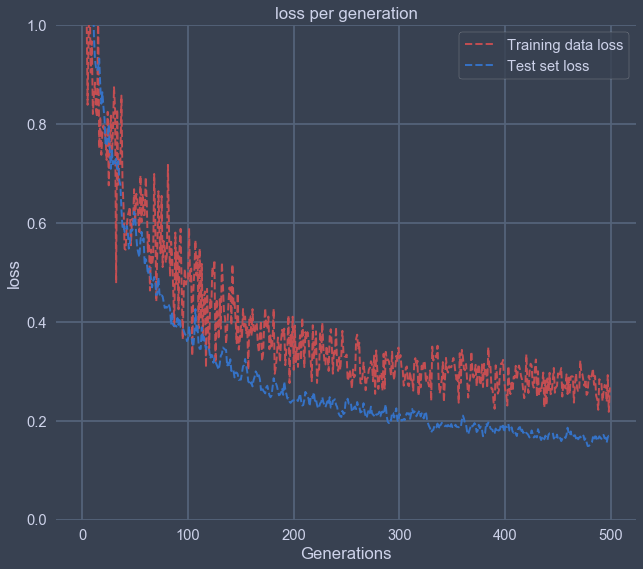

In [0]:
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='-')

plt.plot(loss_vec, 'r--', label = 'Training data loss')
plt.plot(test_set_loss, 'b--', label = "Test set loss")
plt.title("loss per generation")
plt.ylim([0,1.0])
plt.xlabel('Generations')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()